In [9]:
# 50_Startups — Veri Görselleştirme Notebook
# Bu notebook .ipynb olarak çalıştırılmak üzere hazırlandı.
# İçinde hem kodlar hem de veriye dair analiz (yorum) hücreleri bulunuyor.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

In [12]:
data = pd.read_csv('50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [13]:
# Bu veri seti 50 farklı startup şirketinin çeşitli harcamalarını ve kârlılıklarını içeriyor:
# - R&D Spend: Ar-Ge harcaması
# - Administration: Yönetim harcaması
# - Marketing Spend: Pazarlama harcaması
# - State: Şirketin bulunduğu eyalet
# - Profit: Şirketin kârı
# Bu veriyi kullanarak harcamalar ile kâr arasındaki ilişkileri görselleştireceğiz.

#### R&D Harcaması ve Kâr

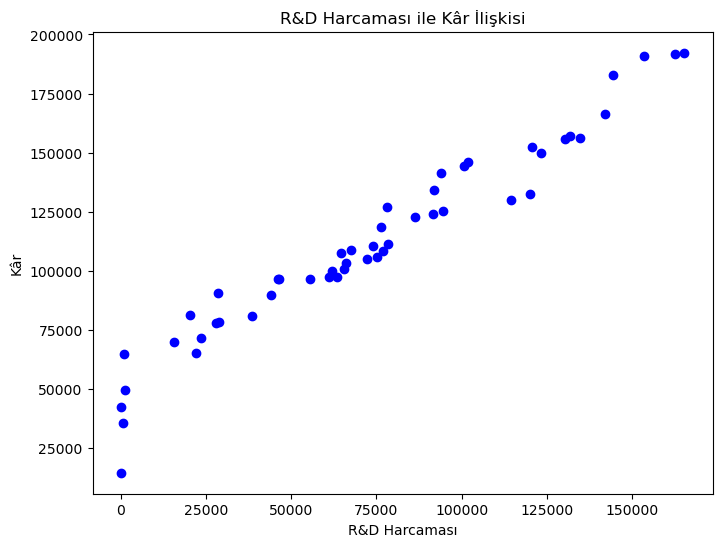

In [18]:
plt.figure(figsize=(8,6))
plt.scatter(data['R&D Spend'], data['Profit'], color='blue')
plt.xlabel("R&D Harcaması")
plt.ylabel("Kâr")
plt.title("R&D Harcaması ile Kâr İlişkisi")
plt.show()

##### Gözlem: 
Grafik R&D harcaması arttıkça kârın da genelde yükseldiğini gösteriyor.
##### Yorum: 
Ar-Ge’ye yapılan yatırımın kârlılığı güçlü biçimde desteklediğini düşündürüyor. Ancak bazı şirketler düşük R&D harcamasıyla da ortalamanın üzerinde kâr elde etmiş; yani sadece R&D tek başına başarı garantisi değil.

#### Yönetim Harcaması ve Kâr

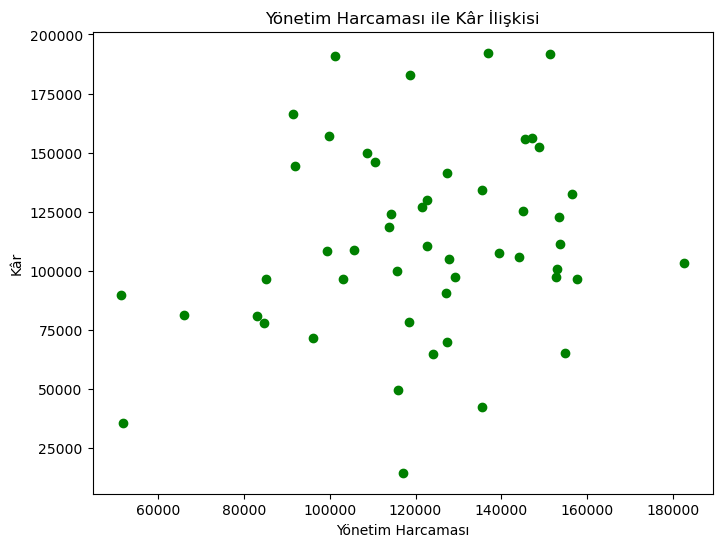

In [22]:
plt.figure(figsize=(8,6))
plt.scatter(data['Administration'], data['Profit'], color='green')
plt.xlabel("Yönetim Harcaması")
plt.ylabel("Kâr")
plt.title("Yönetim Harcaması ile Kâr İlişkisi")
plt.show()

##### Gözlem: 
Noktalar oldukça dağınık, belirgin bir artış eğilimi yok.
##### Yorum: 
Yönetim harcamalarının kâr üzerinde doğrudan bir etkisi olmadığı, hatta yüksek yönetim giderlerinin kârı artırmadığı söylenebilir.

#### Eyaletlere Göre Ortalama Kâr

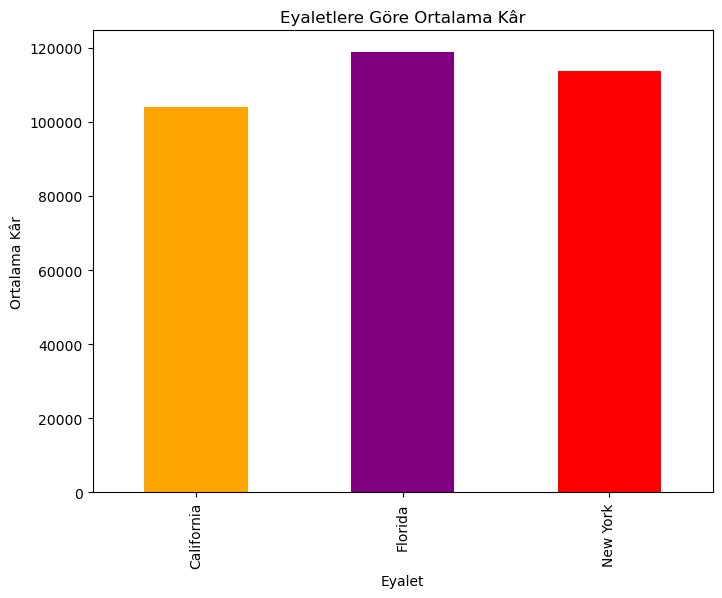

In [26]:
state_profit = data.groupby('State')['Profit'].mean()
plt.figure(figsize=(8,6))
state_profit.plot(kind='bar', color=['orange', 'purple', 'red'])
plt.xlabel("Eyalet")
plt.ylabel("Ortalama Kâr")
plt.title("Eyaletlere Göre Ortalama Kâr")
plt.show()

##### Gözlem: 
Florida’daki girişimlerin ortalama kârı (~12.000) diğer eyaletlerden biraz daha yüksek. New York ortalama ~11.000, California ise ~10.000 civarında.
##### Yorum: 
Eyaletler arasında çok büyük farklar yok; bu da kârlılığın eyaletten ziyade şirketin harcama stratejisine daha çok bağlı olduğunu düşündürüyor.

#### Harcama Türlerinin Karşılaştırması

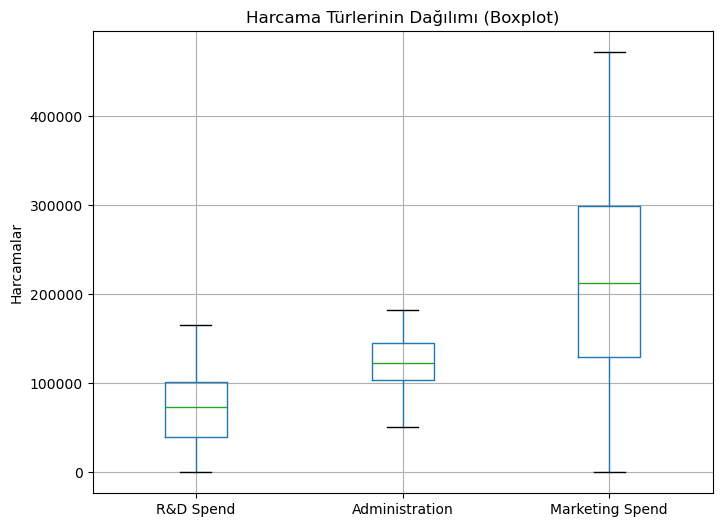

In [30]:
plt.figure(figsize=(8,6))
data[['R&D Spend', 'Administration', 'Marketing Spend']].boxplot()
plt.title("Harcama Türlerinin Dağılımı (Boxplot)")
plt.ylabel("Harcamalar")
plt.show()

##### Gözlem: 
Grafikte üç harcama türü arasında dağılım farklılıkları net olarak görünüyor.
-- R&D Harcamaları, düşükten yükseğe geniş bir aralıkta yayılmış, medyanı görece düşük.
-- Administration Harcamaları, daha dar bir aralıkta toplanmış ve dağılım daha dengeli.
-- Marketing Harcamaları, en yüksek medyana sahip ve aşırı uç (outlier) değerler barındırıyor.
##### Yorum: 
Ar-Ge harcamaları çok değişken olduğundan bazı şirketler düşük yatırım yaparken bazıları çok yüksek yatırım yapıyor. Bu da Ar-Ge’nin kârlılıktaki etkisinin şirketten şirkete farklılaştığını düşündürüyor.
Yönetim harcamaları ise daha standart ve öngörülebilir seviyelerde seyrediyor. Pazarlama harcamaları ise şirketlerin büyüme stratejilerine göre ciddi farklılıklar gösteriyor; yüksek pazarlama yatırımları yapan firmaların potansiyel kârlarını artırmayı hedeflediği söylenebilir.

## Genel Analiz
Yapılan görselleştirmeler, startup şirketlerinin farklı harcama kalemlerinin kârlılık üzerindeki etkilerini ortaya koyuyor.

##### Ar-Ge Harcamaları (R&D Spend) kârla en güçlü ilişkiye sahip. Yani yenilikçi çalışmalara yatırım yapan firmalar genellikle daha yüksek kâr elde ediyor.
##### Yönetim Harcamaları (Administration) ile kâr arasında belirgin bir ilişki görülmüyor. Bu, yönetim giderlerinin kârlılığa doğrudan katkı sağlamadığını düşündürüyor.
##### Pazarlama Harcamaları (Marketing Spend) yüksek varyansa sahip. Bazı şirketler yüksek pazarlama yatırımıyla kârını artırırken, bazıları aynı düzeyde başarı elde edememiş. Yani pazarlamanın etkisi stratejiye göre değişiyor.

##### Eyalet Bazında Ortalama Kâr karşılaştırması, lokasyonun da kârlılıkta rol oynayabileceğini ancak temel belirleyici faktörün harcama stratejileri olduğunu gösteriyor.

Sonuç olarak, startup’ların sürdürülebilir kârlılık elde etmesinde en kritik faktörün Ar-Ge yatırımları olduğu, pazarlamanın ise doğru stratejiyle birleştiğinde güçlü bir destek sağlayabileceği söylenebilir. Yönetim harcamaları ise operasyonel gereklilikten öteye geçmemektedir.